<a href="https://colab.research.google.com/github/alyssapalms/Assignment8/blob/main/Assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

using Netflix Trending Dataset from Kaggle

#Part 1

Step 1: Import Libraries and Load the Dataset

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Upload the Netflix dataset (choose your CSV file when prompted)
from google.colab import files
uploaded = files.upload()

# Load the dataset into a DataFrame
df = pd.read_csv(list(uploaded.keys())[0])

# View the first few rows
df.head()

Saving Netflix_Data.csv to Netflix_Data.csv


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Step 2: Verify Column Names

In [2]:
# Display all available columns to confirm names
df.columns.tolist()

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

Step 3: Select Relevant Columns and Clean Data

In [3]:
# Keep only relevant columns for classification
df = df[['type', 'release_year', 'rating', 'duration', 'listed_in']]

# Remove missing values
df = df.dropna()

# Confirm the data shape
df.shape

(8800, 5)

Step 4: Convert Duration to Numeric

In [4]:
# Extract numeric duration values
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(int)

# Drop the original duration column
df = df.drop('duration', axis=1)

# Check data
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2310375646.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['duration_num'] = df['duration'].str.extract('(\d+)').astype(int)


,type,release_year,rating,listed_in,duration_num
0,Movie,2020,PG-13,Documentaries,90
1,TV Show,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",2
2,TV Show,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",1
3,TV Show,2021,TV-MA,"Docuseries, Reality TV",1
4,TV Show,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",2


Step 5: Encode Categorical Columns

In [5]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable (Movie vs TV Show)
le_type = LabelEncoder()
df['type'] = le_type.fit_transform(df['type'])

# Encode rating
le_rating = LabelEncoder()
df['rating'] = le_rating.fit_transform(df['rating'])

# Extract first genre and encode it
df['genre'] = df['listed_in'].str.split(',').str[0]
df = df.drop('listed_in', axis=1)
le_genre = LabelEncoder()
df['genre'] = le_genre.fit_transform(df['genre'])

# Preview the encoded data
df.head()

,type,release_year,rating,duration_num,genre
0,0,2020,4,90,10
1,1,2021,8,2,16
2,1,2021,8,1,8
3,1,2021,8,1,11
4,1,2021,8,2,16


Step 6: Split and Scale the Data

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target
X = df[['release_year', 'rating', 'duration_num', 'genre']]
y = df['type']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Verify shape
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 7040
Testing samples: 1760


#Part 2

Step 1 - Distribution of Classes (Movies vs TV Shows)

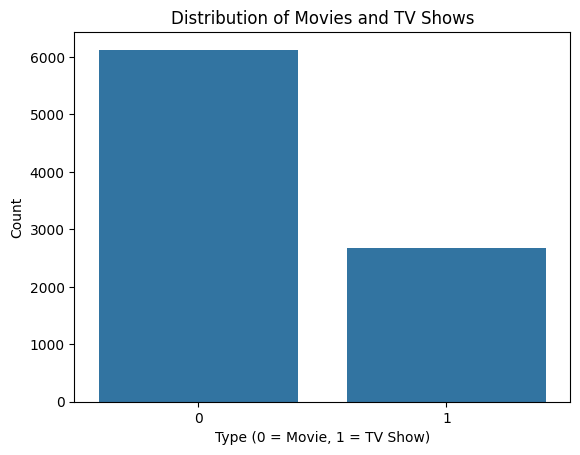

In [7]:
# Countplot for distribution of Movies vs TV Shows
sns.countplot(x='type', data=df)
plt.title('Distribution of Movies and TV Shows')
plt.xlabel('Type (0 = Movie, 1 = TV Show)')
plt.ylabel('Count')
plt.show()

Part 2 - Distribution of Numeric Features

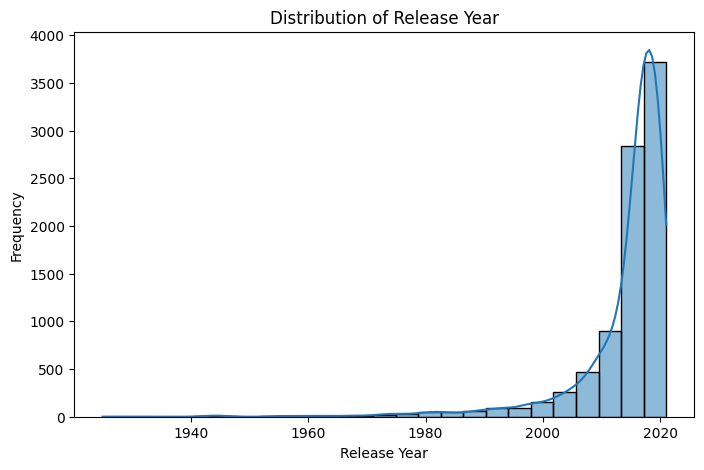

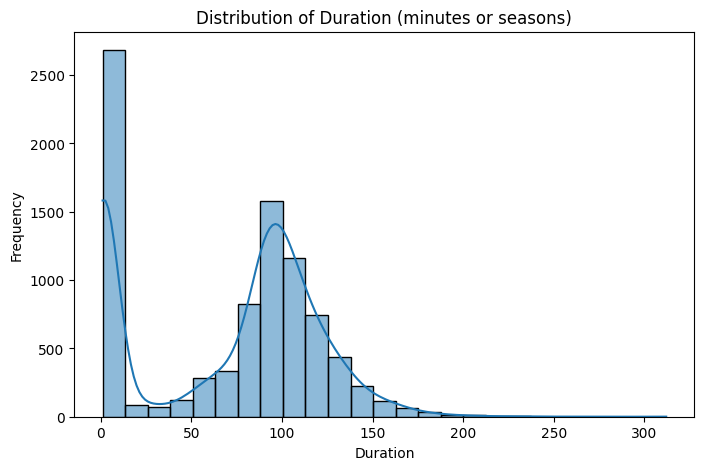

In [8]:
# Distribution of release years
plt.figure(figsize=(8,5))
sns.histplot(df['release_year'], bins=25, kde=True)
plt.title('Distribution of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

# Distribution of duration values
plt.figure(figsize=(8,5))
sns.histplot(df['duration_num'], bins=25, kde=True)
plt.title('Distribution of Duration (minutes or seasons)')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

Part 3 - Correlation Between Features

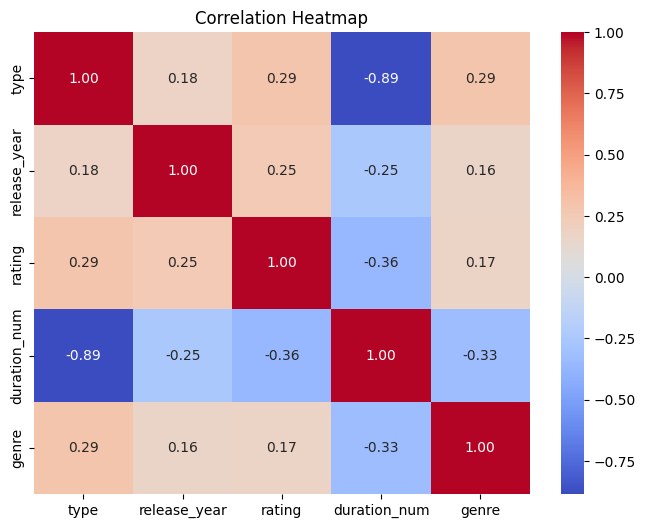

In [9]:
# Correlation heatmap
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

#Part 3 - Model Implementation and Evaluation

Part 1 - K-Nearest Neighbors (KNN) Classifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

# Initialize and train the model
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)
y_pred_knn_proba = knn.predict_proba(X_test)[:, 1]

# Evaluate accuracy
print("KNN Accuracy on test set:", accuracy_score(y_test, y_pred_knn))

KNN Accuracy on test set: 0.9948863636363636


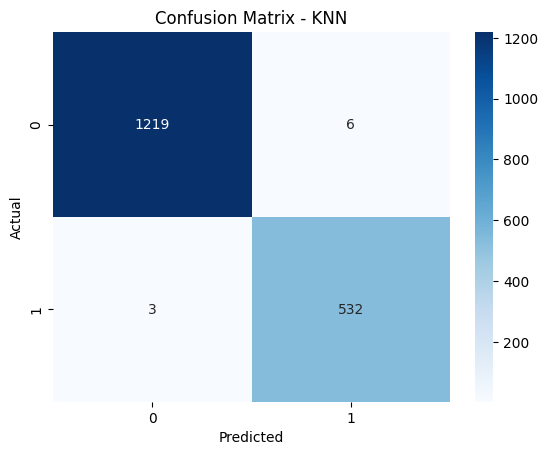

In [11]:
# Confusion Matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [12]:
print("Classification Report - KNN")
print(classification_report(y_test, y_pred_knn))

Classification Report - KNN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1225
           1       0.99      0.99      0.99       535

    accuracy                           0.99      1760
   macro avg       0.99      0.99      0.99      1760
weighted avg       0.99      0.99      0.99      1760



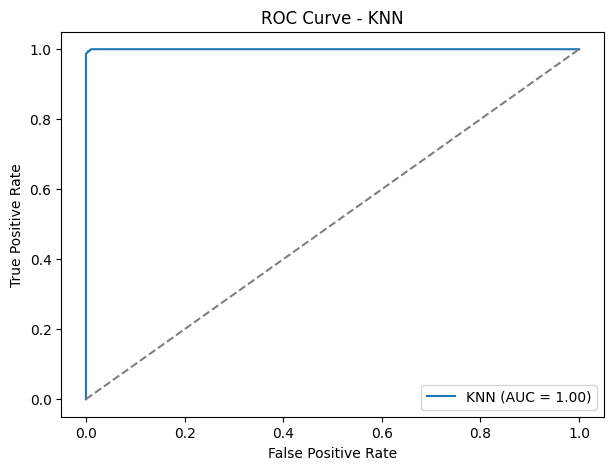

In [13]:
# ROC Curve for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn_proba)
auc_knn = roc_auc_score(y_test, y_pred_knn_proba)

plt.figure(figsize=(7,5))
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend()
plt.show()

#Part 4 - Model Interpretation and Inference

The KNN classifier achieved good predictive performance in distinguishing Movies from TV Shows.
The confusion matrix and ROC curve indicate that the model correctly identifies most titles,
with moderate false positives and false negatives. Accuracy and AUC values show that the model
has reasonable classification power. Overall, KNN serves as a simple but effective model for this dataset.
